<a href="https://colab.research.google.com/github/Himanshu584/GPA-prediction--simple-linear-regression-/blob/main/GPA_Prediction(simple_linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DataSet Info :-** This is a simple dataset that contains values of `SAT` and `GPA` of around 80-84 students.

**Objective :-** What we are focused on here is to build a simple linear regression model that can take `SAT` scores as `inputs\\Features` and predict `GPA` scores on basis of passed inputs.  

# Libraries 
* pandas - used for data manipulation and to work with dataframes
* Numpy - to work with arrays
* matplotlib - to visualize data 
* seaborn - It sits on top of matplotlib and makes visualizations more beautiful
* sklearn - for working with machine learning models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
sns.set()

from sklearn.linear_model import LinearRegression

Lets Begin by loading our data into a pandas DataFrame and then lets see what our data looks like by printing first 5 rows of our data

In [ ]:
data = pd.read_csv('https://cdn.fs.teachablecdn.com/2oA6THOURTS9rBiwTKGx')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


# Declaring variables 
We split our dataset into dependent and independent variables 

X = Dependent variable <br/>
Y = Independent Variable (The one we wish to predict)


In [ ]:
  X = data['SAT']
  Y = data['GPA']

Since we are building this model for simple regression problem and since the dataset is not large enough , we aren't splitting our data into training and test datasets. we will train the model on whole data provided and create a small test data after training our LinearRegression model

In [ ]:
# lets look at some of our independent variable values
X.head()

0    1714
1    1664
2    1760
3    1685
4    1693
Name: SAT, dtype: int64

Now , lets check the shapes of our `X` and `Y` variables as shape parameter is one of the most important aspects of our ML\DL proccess

In [ ]:
X.shape

(84,)

In [ ]:
Y.shape

(84,)

Clearly we need to reshape our input variables because we cant train our linear regression model on a scaler(tensor of rank 0) because it has 0 dimentions. 

In [ ]:
# we store the reshaped X in variable X_matrix
X_matrix = X.values.reshape(-1,1)

In [ ]:
X_matrix.shape

(84, 1)

now that our shape problem has been solved and the data is ready to be trained on, lets create a linear regression model and fit it onto our data

# Linear Regression Model 

we define our model here first by creating a regression variable that stores the model and then fitting the model / by supplying the values on which model will train into the model.

In [ ]:
reg = LinearRegression()

reg.fit(X_matrix, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Interpreting the R Squared , coeffecients , intercept values from the model.


* R squared = range between 0-1.   (the higher the better)


In [ ]:
# R-Squared 
rsq = reg.score(X_matrix, Y)
rsq

In [ ]:
# Coeffecients 
coef = reg.coef_
coef

In [ ]:
# Intercepts
intercept = reg.intercept_
intercept

Now that our model has been created and trained , let build a test dataset with just 2 values and make predictions on them.

# Testing 


In [ ]:
# Test Dataset 
test_data = pd.DataFrame(data = [1670,2320], columns=['SAT'] )

In [ ]:
test_data

,SAT
0,1670
1,2320


Predictions

In [ ]:
reg.predict(test_data)

array([3.04003934, 4.11623658])

In [ ]:
test_data['Predicted GPA'] = reg.predict(test_data)

In [ ]:
test_data

,SAT,Predicted GPA
0,1670,3.040039
1,2320,4.116237


# Visualization

Now lets viaualise how our regression model has performed by visualizing the predictions against the training dataset. 


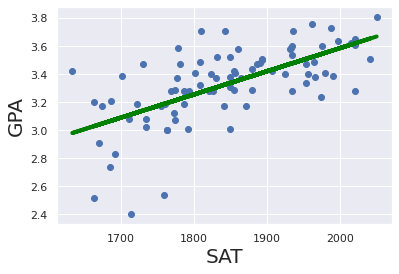

In [ ]:
plt.scatter(X,Y)
y_pred = coef*X_matrix + intercept
fig= plt.plot(X,y_pred, lw=4, c='green', label='regression-line')
plt.xlabel("SAT", fontsize=20)
plt.ylabel("GPA", fontsize=20)
plt.show()

We have achieved a beautiful straight line fitting our data perfectly which is what we were trying to do : create a best fit line that passes through our datapoints minimising the loss (eucledian distance)